In [1]:
import dask.dataframe as dd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

# set neat seaborn whitegrid styles for matplotlib charts
plt.style.use('seaborn')
sns.set_style('whitegrid')

In [3]:
%%time
# set data file path
data_file_name = '../data/crimes-2001-to-present.snappy.parq'
print('Loading data file: {}'.format(data_file_name))

# load crimes parquet data into dask df
crimes = dd.read_parquet(data_file_name, index='Date')

# load all data into memory
crimes = crimes.persist()
print('Crime data loaded into memory.')

Loading data file: ../data/crimes-2001-to-present.snappy.parq
Crime data loaded into memory.
Wall time: 13.1 s


In [4]:
%%time
# log records count and load data partitions
print('Chicago Crime data stats:')
print('---------------------------------------')
print('{:,} total records in {} partitions'.format(len(crimes), crimes.npartitions))
print('DataFrame size: {:,}'.format(crimes.size.compute()))

Chicago Crime data stats:
---------------------------------------
6,343,952 total records in 1 partitions
DataFrame size: 50,751,616
Wall time: 4.88 ms


In [5]:
# check data frame structure
crimes

,Block,PrimaryType,Description,LocationDescription,Arrest,Domestic,Latitude,Longitude
npartitions=1,,,,,,,,
2001-01-01 00:00:00,object,object,object,object,bool,bool,float64,float64
2017-06-15 23:59:00,...,...,...,...,...,...,...,...


In [6]:
%%time
# preview crimes data with Date index
crimes.head(5)

Wall time: 1.95 ms


,Block,PrimaryType,Description,LocationDescription,Arrest,Domestic,Latitude,Longitude
Date,,,,,,,,
2001-09-15 02:00:00,013XX W POLK ST,BATTERY,SIMPLE,STREET,False,False,NaN,NaN
2001-11-02 18:30:00,002XX W CONGRESS PW,THEFT,OVER $500,OTHER,False,False,NaN,NaN
2001-12-15 02:00:00,011XX N STATE ST,BATTERY,SIMPLE,STREET,False,False,NaN,NaN
2002-09-26 13:30:00,034XX W 79TH ST,BATTERY,SIMPLE,STREET,False,False,NaN,NaN
2002-10-01 19:00:00,022XX W NORTH AVE,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,NaN,NaN


In [7]:
%%time

# get crime types
crime_types = crimes[['PrimaryType']]

# get crime counts by primary type
crime_type_total = crime_types.groupby('PrimaryType').size().compute()

# get arrests and domestic counts for each primary crime type
crime_type_counts = crimes[['PrimaryType', 'Arrest', 'Domestic']]\
.groupby('PrimaryType').sum().compute()

# add crime type totals column
crime_type_counts['Total'] = crime_type_total

# print all crime stats (arrests, domestic + total)
print(crime_type_counts.sort_values(by='Total', ascending=False))

                                     Arrest  Domestic    Total
PrimaryType                                                   
THEFT                              159868.0   30461.0  1322117
BATTERY                            266032.0  488841.0  1160354
CRIMINAL DAMAGE                     51857.0   54703.0   728750
NARCOTICS                          680928.0     243.0   685180
OTHER OFFENSE                       69425.0  114427.0   393897
ASSAULT                             91871.0   84316.0   389711
BURGLARY                            21240.0    2427.0   369599
MOTOR VEHICLE THEFT                 27588.0    1112.0   298838
ROBBERY                             23472.0    3854.0   240230
DECEPTIVE PRACTICE                  42505.0    2737.0   232990
CRIMINAL TRESPASS                  136053.0    5760.0   183442
PROSTITUTION                        65932.0       6.0    66192
WEAPONS VIOLATION                   50773.0     223.0    63144
PUBLIC PEACE VIOLATION              29407.0    2136.0  

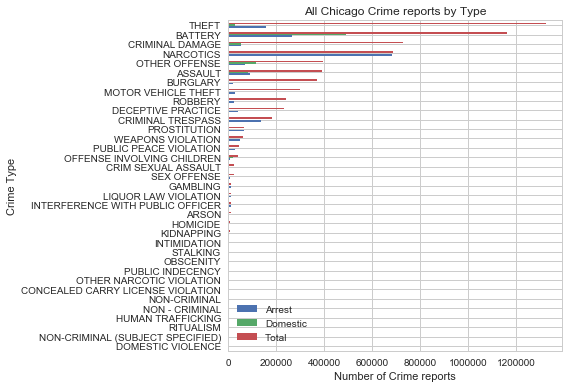

In [8]:
# plot crimes by primary type counts
plt.figure(figsize=(8,10))
crime_type_counts.sort_values(by='Total', ascending=True).plot(kind='barh')

plt.title('All Chicago Crime reports by Type')
plt.ylabel('Crime Type')
plt.xlabel('Number of Crime reports')
plt.tight_layout()
plt.show()